In [84]:
import numpy as np
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns


In [85]:
X=pd.read_csv('Final_Phase1.csv')

In [86]:
X=X.drop(['artist','title'],axis=1)

In [87]:
X.isnull().sum().sum()

2

In [88]:
X=X.dropna()

In [89]:
X=X.drop_duplicates()

In [90]:
#y=X.Popularity
#X=X.drop('Popularity',axis=1)
#trainx,validx,trainy,validy=train_test_split(X,y,random_state=1)

In [91]:
X

Popularity  chroma_stft0min  chroma_stft0mean  chroma_stft0median  \
0             1         0.059570          0.545835            0.533538   
1             1         0.015278          0.275441            0.220618   
2             1         0.003058          0.404499            0.303639   
3             1         0.022964          0.520444            0.448769   
4             1         0.011911          0.306385            0.248289   
..          ...              ...               ...                 ...   
886           0         0.003528          0.356988            0.225380   
887           0         0.006371          0.309186            0.138678   
888           0         0.005112          0.435054            0.343724   
889           0         0.009845          0.420395            0.307765   
890           0         0.013117          0.423746            0.356778   

     chroma_stft0max  chroma_stft0std  chroma_stft0skew  chroma_stft0kurtosis  \
0                1.0         0.256356          0.082964             -1.077184   
1                1.0         0.227229          1.421235              1.736412   
2                1.0         0.318527          0.687863             -0.836097   
3                1.0         0.363116          0.184452             -1.552747   
4                1.0         0.234466          1.032283              0.458042   
..               ...              ...               ...                   ...   
886              1.0         0.329483          0.972939             -0.484435   
887              1.0         0.333071          1.067800             -0.268092   
888              1.0         0.313984          0.552945             -0.982608   
889              1.0         0.346236          0.609563             -1.079443   
890              1.0         0.274292          0.651191             -0.645266   

     chroma_stft1min  chroma_stft1mean  ...   rms0std  rms0skew  rms0kurtosis  \
0           0.032182          0.555278  ...  0.118361  0.461793     -0.740521   
1           0.007746          0.317036  ...  0.069799 -0.636223      0.176648   
2           0.001740          0.440006  ...  0.118551  0.159358     -0.991634   
3           0.012189          0.274471  ...  0.074700 -0.013273     -0.652805   
4           0.013393          0.408202  ...  0.094986  0.539557      0.497728   
..               ...               ...  ...       ...       ...           ...   
886         0.003310          0.351698  ...  0.090464 -0.716734     -0.563802   
887         0.005393          0.260614  ...  0.059601  0.083784     -0.591777   
888         0.004729          0.371708  ...  0.077071 -0.646991      0.722369   
889         0.008878          0.280907  ...  0.057873 -0.155593     -0.679073   
890         0.046197          0.453107  ...  0.089567  0.779537      0.162482   

     zero_crossing_rate0min  zero_crossing_rate0mean  \
0                  0.006348                 0.040369   
1                  0.020508                 0.058005   
2                  0.005859                 0.091604   
3                  0.005371                 0.076953   
4                  0.008301                 0.175090   
..                      ...                      ...   
886                0.013672                 0.077117   
887                0.009277                 0.090098   
888                0.008301                 0.065984   
889                0.020508                 0.105433   
890                0.006348                 0.062923   

     zero_crossing_rate0median  zero_crossing_rate0max  \
0                     0.030762                0.199219   
1                     0.049805                0.283203   
2                     0.084473                0.315918   
3                     0.062988                0.316895   
4                     0.170410                0.628906   
..                         ...                     ...   
886                   0.054688                0.504883   
887                   0.071777   

# Visualization

In [92]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numcol=[c for c in X.columns if (X[c].dtype!='object' and c!='Popularity')]
min_max_scaler = MinMaxScaler()
X[numcol] = min_max_scaler.fit_transform(X[numcol])

In [93]:
X

Popularity  chroma_stft0min  chroma_stft0mean  chroma_stft0median  \
0             1         0.216443          0.643779            0.527096   
1             1         0.055512          0.266310            0.196623   
2             1         0.011111          0.446474            0.284301   
3             1         0.083437          0.608333            0.437572   
4             1         0.043279          0.309509            0.225847   
..          ...              ...               ...                 ...   
886           0         0.012820          0.380150            0.201652   
887           0         0.023150          0.313418            0.110088   
888           0         0.018574          0.489129            0.326635   
889           0         0.035769          0.468666            0.288659   
890           0         0.047659          0.473344            0.340422   

     chroma_stft0max  chroma_stft0std  chroma_stft0skew  chroma_stft0kurtosis  \
0                1.0         0.409486          0.232824              0.038736   
1                1.0         0.308063          0.499289              0.188544   
2                1.0         0.625974          0.353266              0.051573   
3                1.0         0.781237          0.253031              0.013415   
4                1.0         0.333264          0.421844              0.120478   
..               ...              ...               ...                   ...   
886              1.0         0.664123          0.410028              0.070297   
887              1.0         0.676618          0.428916              0.081816   
888              1.0         0.610155          0.326403              0.043772   
889              1.0         0.722460          0.337676              0.038616   
890              1.0         0.471941          0.345964              0.061733   

     chroma_stft1min  chroma_stft1mean  ...   rms0std  rms0skew  rms0kurtosis  \
0           0.117010          0.661193  ...  0.427642  0.503855      0.074424   
1           0.028165          0.305787  ...  0.237396  0.266233      0.144408   
2           0.006326          0.489232  ...  0.428388  0.438405      0.055263   
3           0.044318          0.242290  ...  0.256596  0.401045      0.081117   
4           0.048694          0.441787  ...  0.336069  0.520683      0.168907   
..               ...               ...  ...       ...       ...           ...   
886         0.012036          0.357495  ...  0.318355  0.248809      0.087909   
887         0.019607          0.221618  ...  0.197446  0.422050      0.085774   
888         0.017194          0.387346  ...  0.265886  0.263902      0.186048   
889         0.032278          0.251891  ...  0.190677  0.370246      0.079113   
890         0.167965          0.508775  ...  0.314841  0.572618      0.143327   

     zero_crossing_rate0min  zero_crossing_rate0mean  \
0                  0.099237                 0.159270   
1                  0.320611                 0.249274   
2                  0.091603                 0.420749   
3                  0.083969                 0.345974   
4                  0.129771                 0.846821   
..                      ...                      ...   
886                0.213740                 0.346815   
887                0.145038                 0.413065   
888                0.129771                 0.289998   
889                0.320611                 0.491326   
890                0.099237                 0.274371   

     zero_crossing_rate0median  zero_crossing_rate0max  \
0                     0.129973                0.199480   
1                     0.233422                0.311241   
2                     0.421751                0.354776   
3                     0.305040                0.356075   
4                     0.888594                0.771280   
..                         ...                     ...   
886                   0.259947                0.606238   
887                   0.352785   

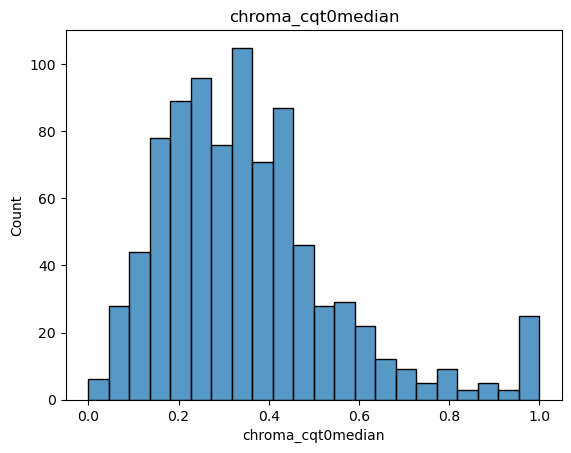

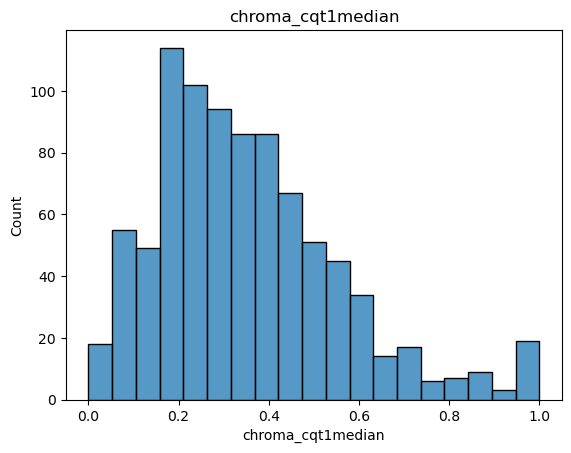

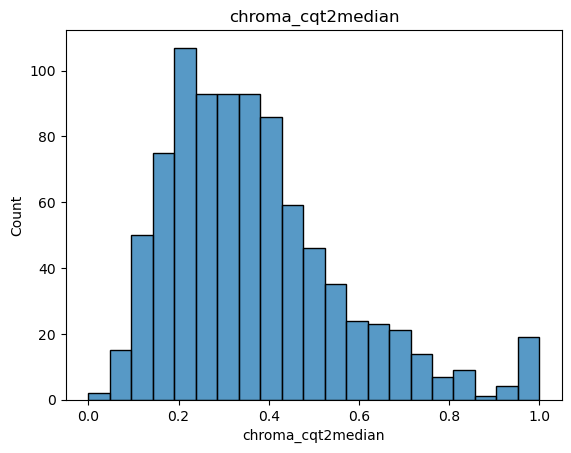

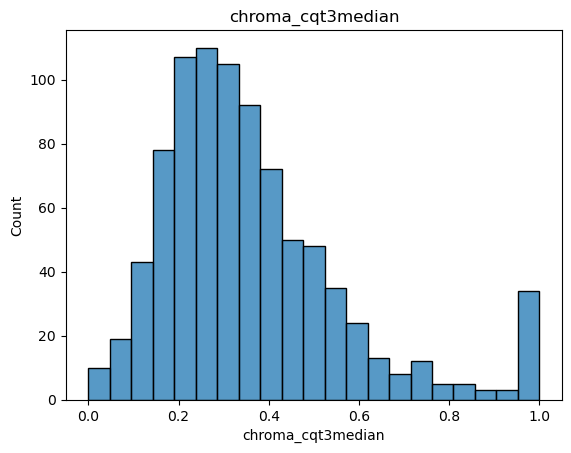

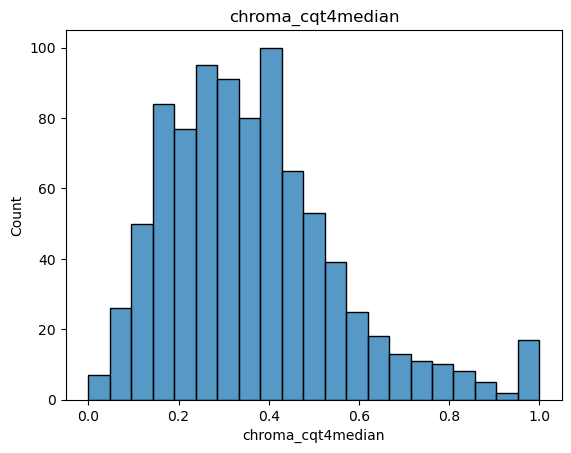

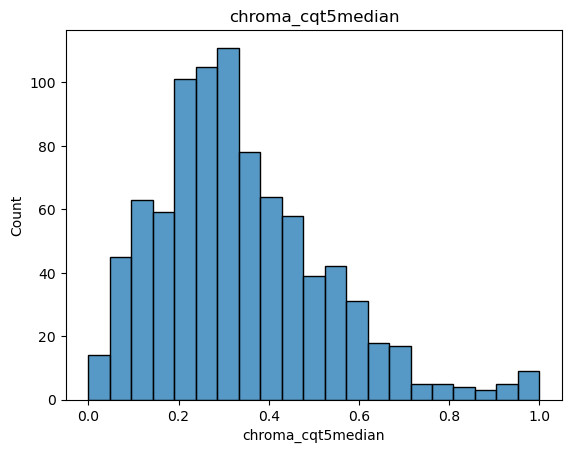

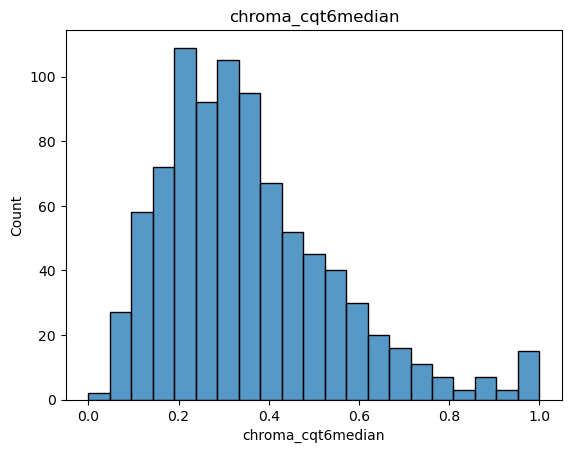

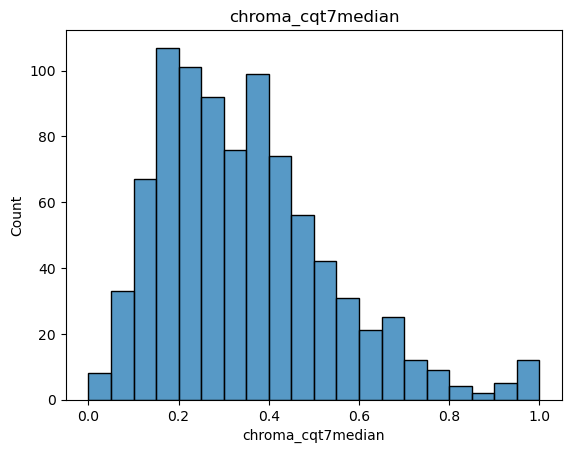

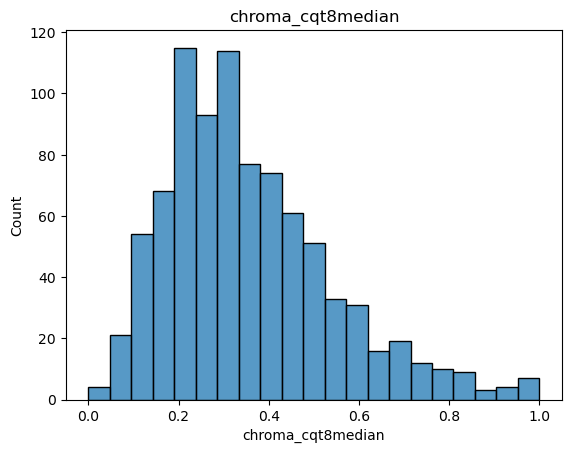

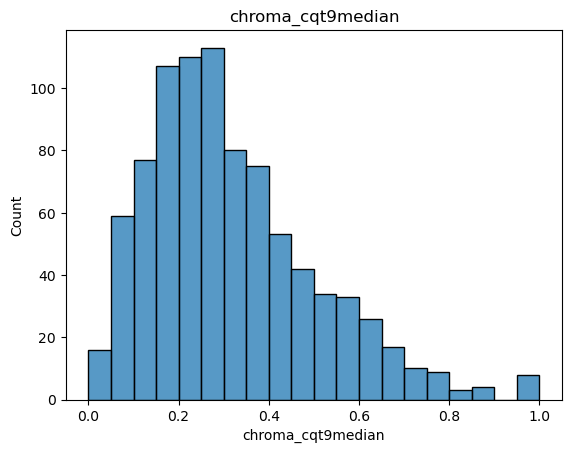

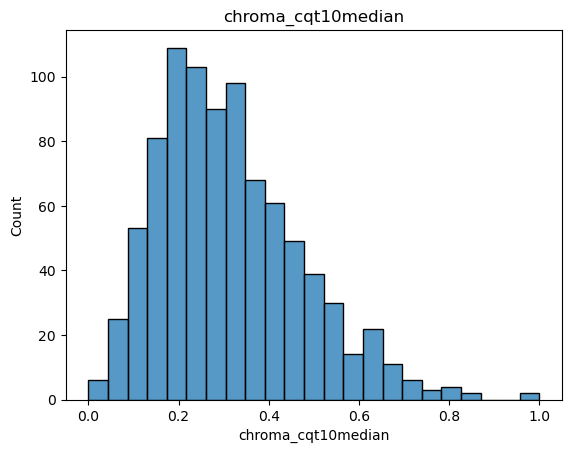

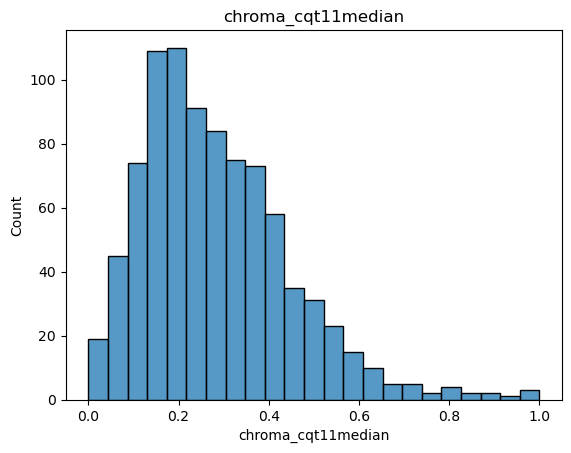

In [94]:
for i in range(12):
    fig, ax = plt.subplots()
    sns.histplot(x=X[f'chroma_cqt{i}median'], ax=ax)
    ax.set_title(f'chroma_cqt{i}median')
    plt.show()


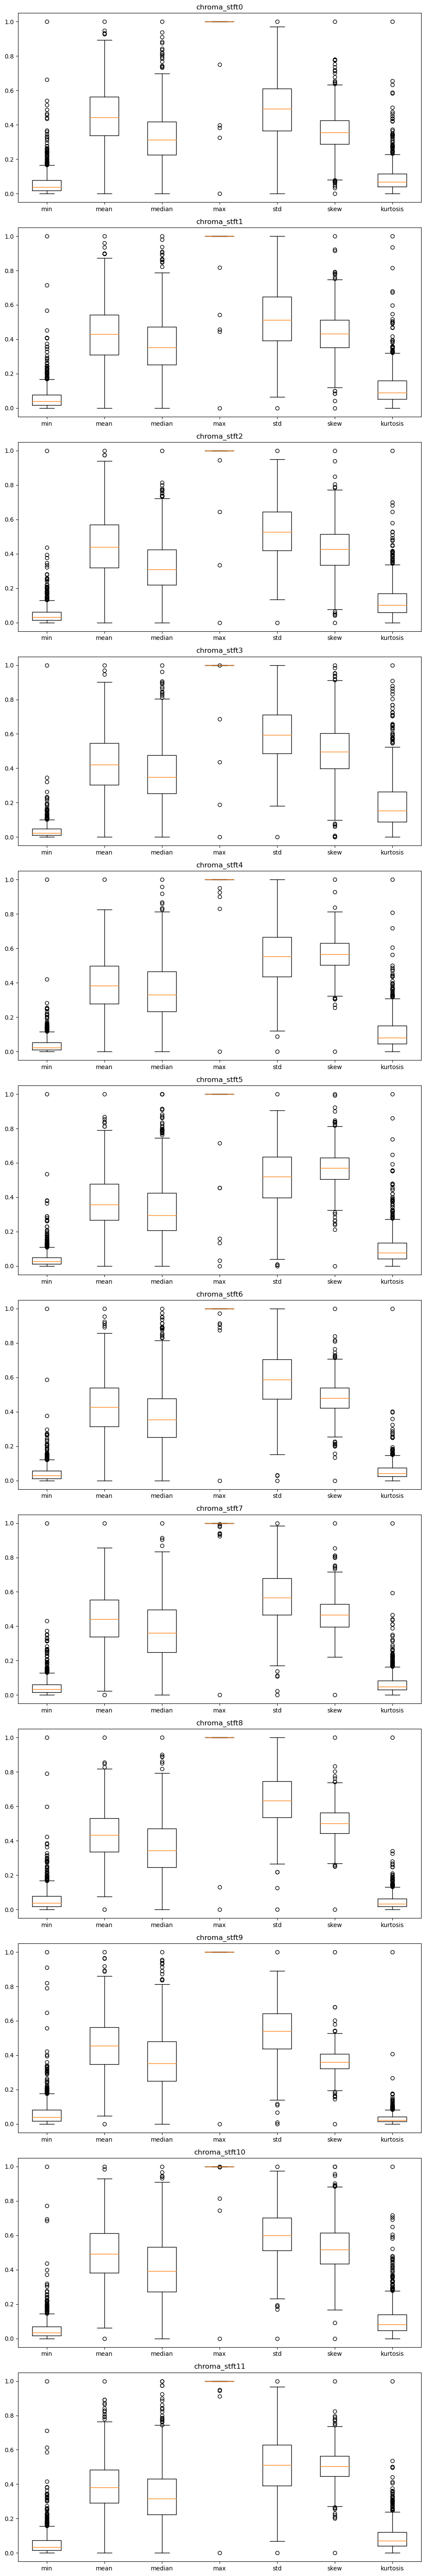

In [95]:
import matplotlib.pyplot as plt

stat = ['min', 'mean', 'median', 'max', 'std', 'skew', 'kurtosis']

# Assuming you have defined the X variable before this code snippet
# Create subplots with 12 rows and 1 column
fig, ax = plt.subplots(12, 1, figsize=(10, 60))

for i in range(12):
    data_to_plot = [X[f'chroma_stft{i}{statistic}'] for statistic in stat]
    ax[i].boxplot(data_to_plot)
    ax[i].set_xticklabels(stat)  # Set the tick labels for the statistics
    ax[i].set_title(f'chroma_stft{i}')

plt.tight_layout()  # Adjusts the spacing between subplots for better visibility
plt.show()


In [96]:
stat = ['min', 'mean', 'median', 'max', 'std', 'skew', 'kurtosis']

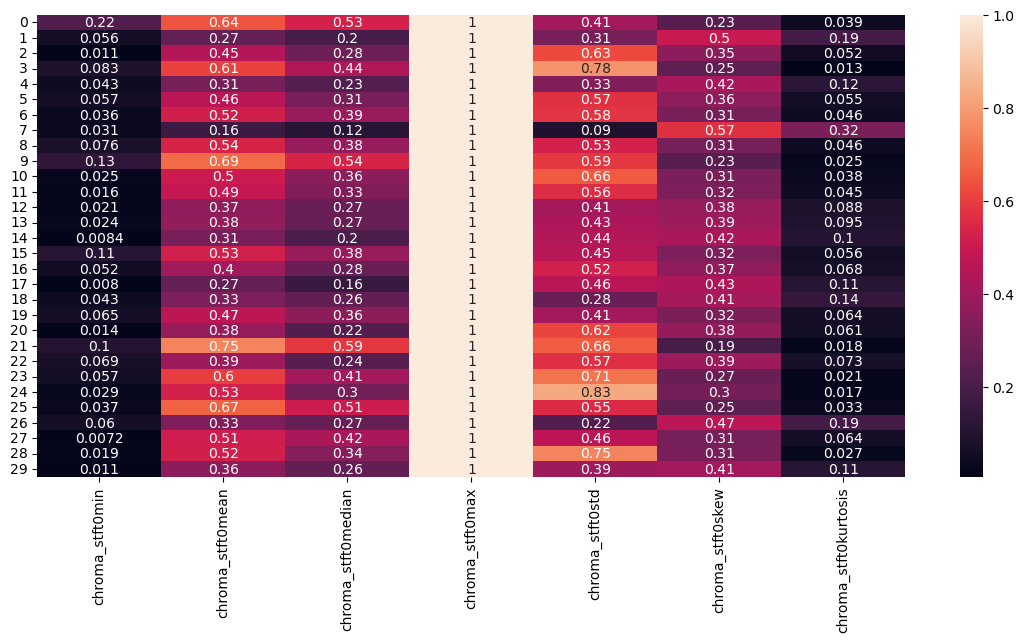

In [97]:

Heatcol=[f'chroma_stft0{col}'for col in stat]

HeatData= pd.DataFrame(X.iloc[0:30, X.columns.isin(Heatcol)])
plt.figure(figsize=(14,6))
plt.title=("Chromastft")
plt.ylabel=('')
sns.heatmap(data=HeatData,annot=True)
plt.show()


# Statistical Analysis:


In [98]:
X.describe()

Popularity  chroma_stft0min  chroma_stft0mean  chroma_stft0median  \
count  876.000000       876.000000        876.000000          876.000000   
mean     0.498858         0.062218          0.455563            0.332612   
std      0.500284         0.079357          0.167395            0.157190   
min      0.000000         0.000000          0.000000            0.000000   
25%      0.000000         0.017070          0.337195            0.224868   
50%      0.000000         0.038277          0.443862            0.312332   
75%      1.000000         0.076780          0.563234            0.418621   
max      1.000000         1.000000          1.000000            1.000000   

       chroma_stft0max  chroma_stft0std  chroma_stft0skew  \
count       876.000000       876.000000        876.000000   
mean          0.996411         0.485449          0.358990   
std           0.050717         0.170520          0.116544   
min           0.000000         0.000000          0.000000   
25%           1.000000         0.364838          0.286754   
50%           1.000000         0.492056          0.355953   
75%           1.000000         0.610543          0.425733   
max           1.000000         1.000000          1.000000   

       chroma_stft0kurtosis  chroma_stft1min  chroma_stft1mean  ...  \
count            876.000000       876.000000        876.000000  ...   
mean               0.092415         0.062463          0.431673  ...   
std                0.088142         0.077359          0.163955  ...   
min                0.000000         0.000000          0.000000  ...   
25%                0.039040         0.015871          0.310676  ...   
50%                0.067647         0.039121          0.429507  ...   
75%                0.114811         0.076735          0.542207  ...   
max                1.000000         1.000000          1.000000  ...   

          rms0std    rms0skew  rms0kurtosis  zero_crossing_rate0min  \
count  876.000000  876.000000    876.000000              876.000000   
mean     0.326343    0.437046      0.147536                0.197218   
std      0.154868    0.149407      0.101430                0.175008   
min      0.000000    0.000000      0.000000                0.000000   
25%      0.210160    0.334299      0.084730                0.068702   
50%      0.310772    0.432456      0.125822                0.129771   
75%      0.423997    0.528204      0.186816                0.274809   
max      1.000000    1.000000      1.000000                1.000000   

       zero_crossing_rate0mean  zero_crossing_rate0median  \
count               876.000000                 876.000000   
mean                  0.399262                   0.371141   
std                   0.157670                   0.167059   
min                   0.000000                   0.000000   
25%                   0.290358                   0.249005   
50%                   0.399324                   0.379973   
75%                   0.503125                   0.485411   
max                   1.000000                   1.000000   

       zero_crossing_rate0max  zero_crossing_rate0std  \
count              876.000000              876.000000   
mean                 0.446865                0.324635   
std                  0.210700                0.164030   
min                  0.000000                0.000000   
25%                  0.276153                0.208808   
50%                  0.422027                0.296031   
75%                  0.609649                0.403406   
max                  1.000000                1.000000   

       zero_crossing_rate0skew  zero_crossing_rate0kurtosis  
count               876.000000                   876.000000  
mean                  0.252981                     0.096550  
std                   0.125856                     0.101803  
min                   0.000000                     0.000000  
25%                   0.165706                     0.033177  
50%                   0.232702                     0.064

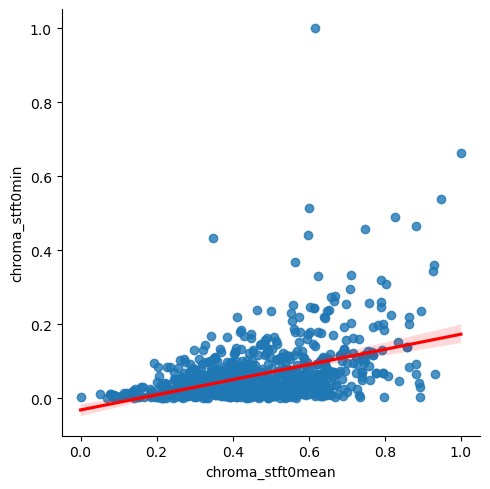

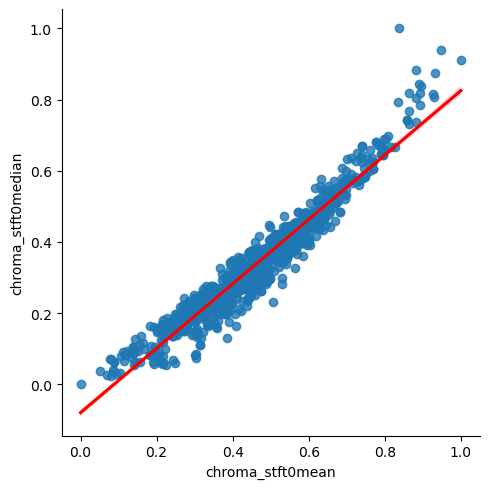

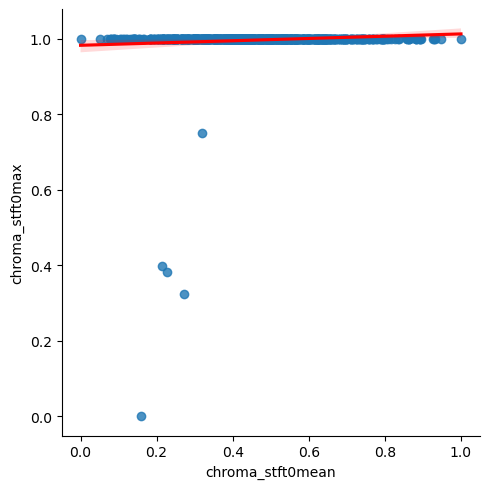

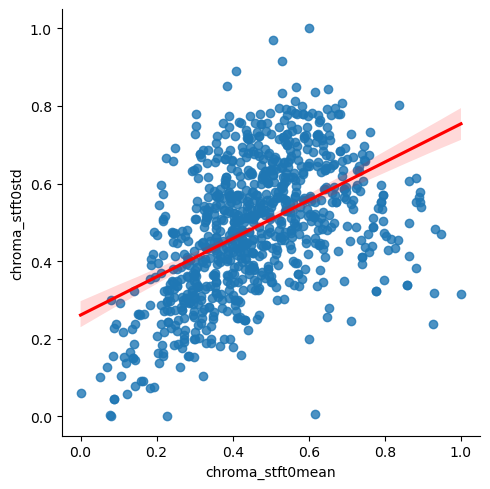

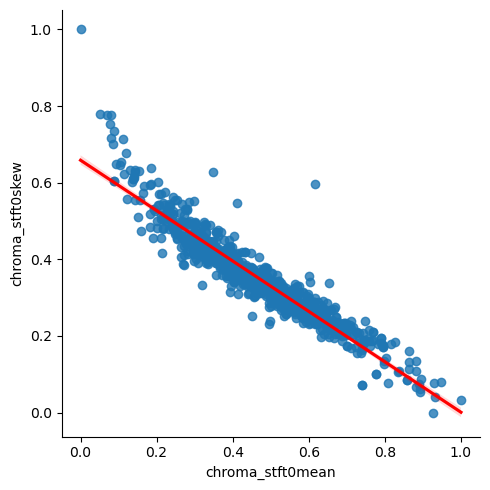

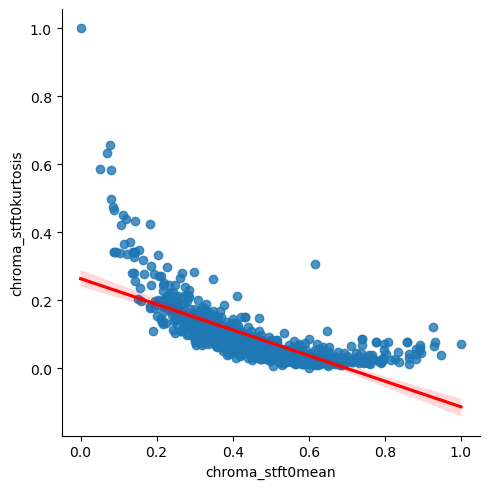

In [99]:
stat = ['min', 'median', 'max', 'std', 'skew', 'kurtosis']
for col in stat:
    sns.lmplot(x=f'chroma_stft0mean',y=f'chroma_stft0{col}',data=X,line_kws={'color': 'red'})


# Feature Distribution:


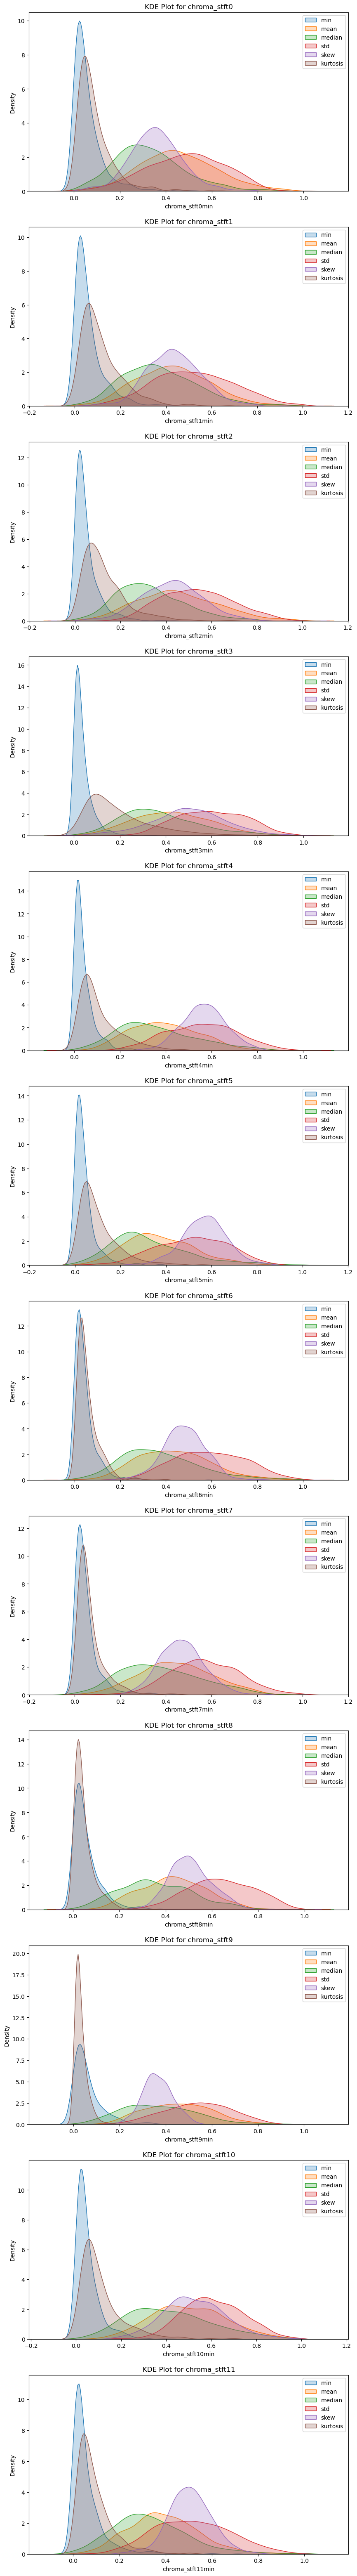

In [100]:
stat = ['min', 'mean', 'median', 'std', 'skew', 'kurtosis']

fig, ax = plt.subplots(12, 1, figsize=(10, 80))

for i in range(12):
    feature_data = [X[f'chroma_stft{i}{statistic}'] for statistic in stat]
    for data, statistic in zip(feature_data, stat):
        sns.kdeplot(data, ax=ax[i], label=statistic, fill=True)
    ax[i].set_title(f'KDE Plot for chroma_stft{i}')
    ax[i].legend()

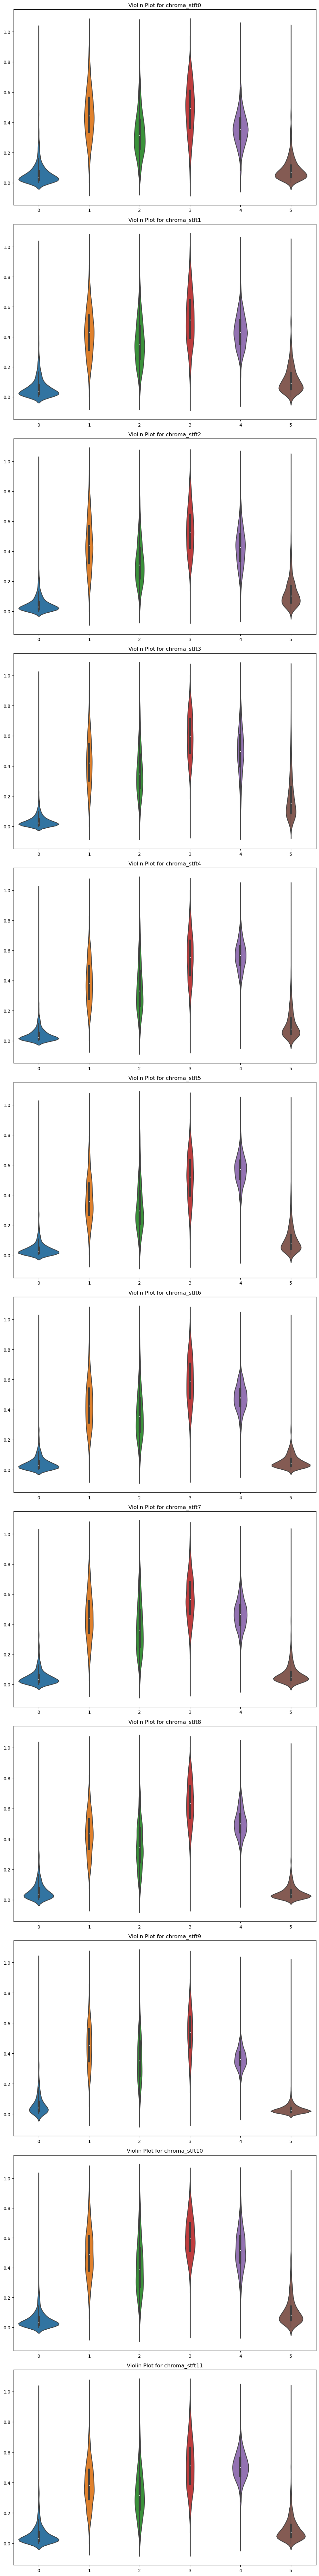

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

stat = ['min', 'mean', 'median', 'std', 'skew', 'kurtosis']

fig, ax = plt.subplots(12, 1, figsize=(10, 80))

for i in range(12):
    feature_data = [X[f'chroma_stft{i}{statistic}'] for statistic in stat]
    sns.violinplot(data=feature_data, ax=ax[i])
    ax[i].set_title(f'Violin Plot for chroma_stft{i}')

plt.tight_layout()

plt.savefig('violin_plots.png', bbox_inches='tight')


In [102]:
import matplotlib.pyplot as plt


# Time-series Analysis:


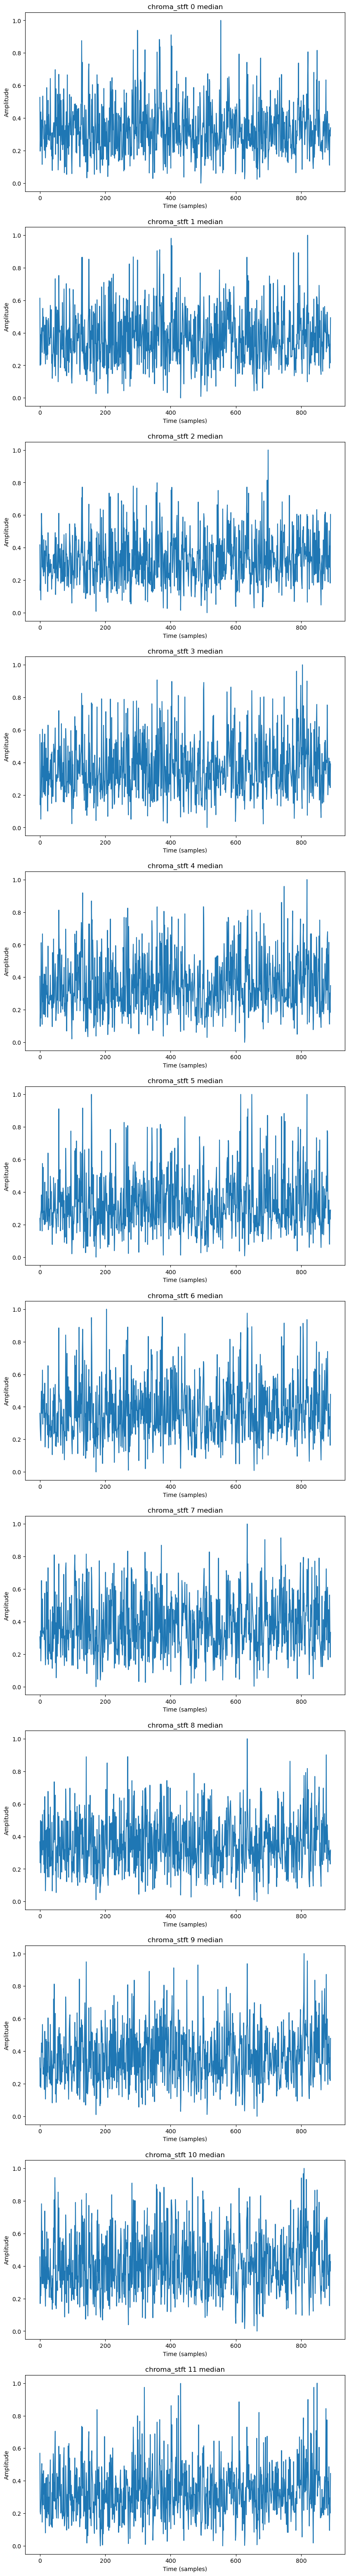

In [103]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(12, 1, figsize=(10, 80))
for i in range(12):
    ax[i].plot(X[f'chroma_stft{i}median'])  # Use ax[i] to plot on the individual subplot
    ax[i].set_title(f'chroma_stft {i} median')
    ax[i].set_xlabel('Time (samples)')
    ax[i].set_ylabel('Amplitude')
plt.show()


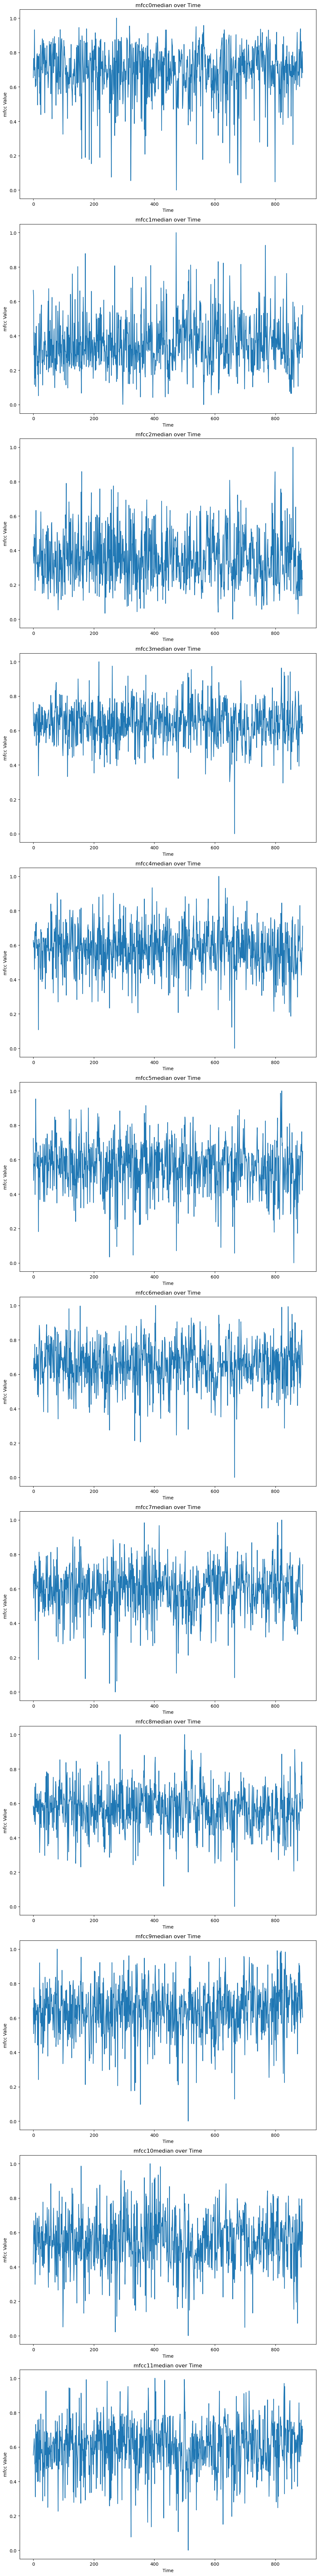

In [104]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named X with MFCC features and an index representing time

# Create subplots
fig, ax = plt.subplots(12, 1, figsize=(10, 80))

# Plot MFCC features over time
for i in range(12):
    ax[i].plot(X.index, X[f'mfcc{i}median'])  # Replace 'mfcc{i}' with the column name for your MFCC feature
    ax[i].set_title(f'mfcc{i}median over Time')
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('mfcc Value')

plt.tight_layout()
plt.show()


# Comparative Analysis:


let's remove some of the outliers first

In [105]:
data=X

In [106]:
data

Popularity  chroma_stft0min  chroma_stft0mean  chroma_stft0median  \
0             1         0.216443          0.643779            0.527096   
1             1         0.055512          0.266310            0.196623   
2             1         0.011111          0.446474            0.284301   
3             1         0.083437          0.608333            0.437572   
4             1         0.043279          0.309509            0.225847   
..          ...              ...               ...                 ...   
886           0         0.012820          0.380150            0.201652   
887           0         0.023150          0.313418            0.110088   
888           0         0.018574          0.489129            0.326635   
889           0         0.035769          0.468666            0.288659   
890           0         0.047659          0.473344            0.340422   

     chroma_stft0max  chroma_stft0std  chroma_stft0skew  chroma_stft0kurtosis  \
0                1.0         0.409486          0.232824              0.038736   
1                1.0         0.308063          0.499289              0.188544   
2                1.0         0.625974          0.353266              0.051573   
3                1.0         0.781237          0.253031              0.013415   
4                1.0         0.333264          0.421844              0.120478   
..               ...              ...               ...                   ...   
886              1.0         0.664123          0.410028              0.070297   
887              1.0         0.676618          0.428916              0.081816   
888              1.0         0.610155          0.326403              0.043772   
889              1.0         0.722460          0.337676              0.038616   
890              1.0         0.471941          0.345964              0.061733   

     chroma_stft1min  chroma_stft1mean  ...   rms0std  rms0skew  rms0kurtosis  \
0           0.117010          0.661193  ...  0.427642  0.503855      0.074424   
1           0.028165          0.305787  ...  0.237396  0.266233      0.144408   
2           0.006326          0.489232  ...  0.428388  0.438405      0.055263   
3           0.044318          0.242290  ...  0.256596  0.401045      0.081117   
4           0.048694          0.441787  ...  0.336069  0.520683      0.168907   
..               ...               ...  ...       ...       ...           ...   
886         0.012036          0.357495  ...  0.318355  0.248809      0.087909   
887         0.019607          0.221618  ...  0.197446  0.422050      0.085774   
888         0.017194          0.387346  ...  0.265886  0.263902      0.186048   
889         0.032278          0.251891  ...  0.190677  0.370246      0.079113   
890         0.167965          0.508775  ...  0.314841  0.572618      0.143327   

     zero_crossing_rate0min  zero_crossing_rate0mean  \
0                  0.099237                 0.159270   
1                  0.320611                 0.249274   
2                  0.091603                 0.420749   
3                  0.083969                 0.345974   
4                  0.129771                 0.846821   
..                      ...                      ...   
886                0.213740                 0.346815   
887                0.145038                 0.413065   
888                0.129771                 0.289998   
889                0.320611                 0.491326   
890                0.099237                 0.274371   

     zero_crossing_rate0median  zero_crossing_rate0max  \
0                     0.129973                0.199480   
1                     0.233422                0.311241   
2                     0.421751                0.354776   
3                     0.305040                0.356075   
4                     0.888594                0.771280   
..                         ...                     ...   
886                   0.259947                0.606238   
887                   0.352785   

In [107]:
for c in numcol:
    data[c] = data[c].apply(lambda x: x + 1)
    data[c] = data[c].apply(np.log)

In [108]:
z=abs((data-data.mean())/data.std())  
x_outliers=data[(z>=8).any(axis=1)].index 


In [109]:
x_outliers

Int64Index([ 98, 123, 138, 139, 150, 156, 159, 162, 169, 171, 219, 225, 264,
            276, 279, 282, 291, 299, 367, 372, 431, 432, 436, 439, 470, 472,
            477, 485, 493, 505, 510, 534, 587, 600, 606, 611, 612, 627, 635,
            663, 665, 670, 739, 756, 769, 799, 802, 809, 818, 819, 820, 821,
            826, 837],
           dtype='int64')

In [110]:
len(x_outliers)

54

In [111]:
data=data.drop(index=x_outliers)


In [112]:
data

Popularity  chroma_stft0min  chroma_stft0mean  chroma_stft0median  \
0             1         0.195931          0.496998            0.423368   
1             1         0.054026          0.236108            0.179504   
2             1         0.011050          0.369129            0.250215   
3             1         0.080138          0.475198            0.362956   
4             1         0.042369          0.269652            0.203632   
..          ...              ...               ...                 ...   
886           0         0.012738          0.322192            0.183698   
887           0         0.022886          0.272633            0.104439   
888           0         0.018403          0.398192            0.282645   
889           0         0.035145          0.384354            0.253602   
890           0         0.046558          0.387535            0.292984   

     chroma_stft0max  chroma_stft0std  chroma_stft0skew  chroma_stft0kurtosis  \
0           0.693147         0.343225          0.209307              0.038005   
1           0.693147         0.268548          0.404991              0.172729   
2           0.693147         0.486107          0.302521              0.050287   
3           0.693147         0.577308          0.225566              0.013326   
4           0.693147         0.287630          0.351955              0.113756   
..               ...              ...               ...                   ...   
886         0.693147         0.509298          0.343610              0.067936   
887         0.693147         0.516779          0.356916              0.078641   
888         0.693147         0.476330          0.282470              0.042841   
889         0.693147         0.543754          0.290934              0.037889   
890         0.693147         0.386582          0.297111              0.059903   

     chroma_stft1min  chroma_stft1mean  ...   rms0std  rms0skew  rms0kurtosis  \
0           0.110656          0.507536  ...  0.356024  0.408032      0.071785   
1           0.027775          0.266806  ...  0.213009  0.236046      0.134887   
2           0.006306          0.398261  ...  0.356547  0.363535      0.053790   
3           0.043364          0.216956  ...  0.228406  0.337219      0.077995   
4           0.047546          0.365883  ...  0.289732  0.419160      0.156069   
..               ...               ...  ...       ...       ...           ...   
886         0.011964          0.305641  ...  0.276385  0.222191      0.084257   
887         0.019417          0.200177  ...  0.180191  0.352099      0.082293   
888         0.017048          0.327393  ...  0.235772  0.234204      0.170627   
889         0.031768          0.224655  ...  0.174522  0.314990      0.076139   
890         0.155263          0.411298  ...  0.273716  0.452742      0.133942   

     zero_crossing_rate0min  zero_crossing_rate0mean  \
0                  0.094616                 0.147790   
1                  0.278094                 0.222562   
2                  0.087647                 0.351184   
3                  0.080630                 0.297118   
4                  0.122015                 0.613466   
..                      ...                      ...   
886                0.193707                 0.297743   
887                0.135438                 0.345761   
888                0.122015                 0.254641   
889                0.278094                 0.399666   
890                0.094616                 0.242453   

     zero_crossing_rate0median  zero_crossing_rate0max  \
0                     0.122194                0.181888   
1                     0.209792                0.270974   
2                     0.351889                0.303636   
3                     0.266234                0.304595   
4                     0.635833                0.571702   
..                         ...                     ...   
886                   0.231070                0.473895   
887                   0.302166   

In [113]:
y=data.Popularity

In [114]:
x=data.drop('Popularity',axis=1)

In [115]:
x

chroma_stft0min  chroma_stft0mean  chroma_stft0median  chroma_stft0max  \
0           0.195931          0.496998            0.423368         0.693147   
1           0.054026          0.236108            0.179504         0.693147   
2           0.011050          0.369129            0.250215         0.693147   
3           0.080138          0.475198            0.362956         0.693147   
4           0.042369          0.269652            0.203632         0.693147   
..               ...               ...                 ...              ...   
886         0.012738          0.322192            0.183698         0.693147   
887         0.022886          0.272633            0.104439         0.693147   
888         0.018403          0.398192            0.282645         0.693147   
889         0.035145          0.384354            0.253602         0.693147   
890         0.046558          0.387535            0.292984         0.693147   

     chroma_stft0std  chroma_stft0skew  chroma_stft0kurtosis  chroma_stft1min  \
0           0.343225          0.209307              0.038005         0.110656   
1           0.268548          0.404991              0.172729         0.027775   
2           0.486107          0.302521              0.050287         0.006306   
3           0.577308          0.225566              0.013326         0.043364   
4           0.287630          0.351955              0.113756         0.047546   
..               ...               ...                   ...              ...   
886         0.509298          0.343610              0.067936         0.011964   
887         0.516779          0.356916              0.078641         0.019417   
888         0.476330          0.282470              0.042841         0.017048   
889         0.543754          0.290934              0.037889         0.031768   
890         0.386582          0.297111              0.059903         0.155263   

     chroma_stft1mean  chroma_stft1median  ...   rms0std  rms0skew  \
0            0.507536            0.477997  ...  0.356024  0.408032   
1            0.266806            0.182726  ...  0.213009  0.236046   
2            0.398261            0.328131  ...  0.356547  0.363535   
3            0.216956            0.188163  ...  0.228406  0.337219   
4            0.365883            0.327687  ...  0.289732  0.419160   
..                ...                 ...  ...       ...       ...   
886          0.305641            0.297827  ...  0.276385  0.222191   
887          0.200177            0.168192  ...  0.180191  0.352099   
888          0.327393            0.285972  ...  0.235772  0.234204   
889          0.224655            0.194680  ...  0.174522  0.314990   
890          0.411298            0.400853  ...  0.273716  0.452742   

     rms0kurtosis  zero_crossing_rate0min  zero_crossing_rate0mean  \
0        0.071785                0.094616                 0.147790   
1        0.134887                0.278094                 0.222562   
2        0.053790                0.087647                 0.351184   
3        0.077995                0.080630                 0.297118   
4        0.156069                0.122015                 0.613466   
..            ...                     ...                      ...   
886      0.084257                0.193707                 0.297743   
887      0.082293                0.135438                 0.345761   
888      0.170627                0.122015                 0.254641   
889      0.076139                0.278094                 0.399666   
890      0.133942                0.094616                 0.242453   

     zero_crossing_rate0median  zero_crossing_rate0max  \
0                     0.122194                0.181888   
1                     0.209792                0.270974   
2                     0.351889                0.303636   
3                     0.266234                0.304595   
4                     0.635833                0.571702   
..                         ...                     ..

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

pca = PCA(0.953, random_state=0)
data_pca = pca.fit_transform(scaled_data)

num_components = data_pca.shape[1]  
pca_df = pd.DataFrame(data_pca, columns=[f'PCA_Component_{i+1}' for i in range(num_components)])


In [117]:
pca_df

PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0           1.192585        -0.493574         8.113930        -1.569679   
1          -1.493374        -9.659196         2.974541        -3.565624   
2          -1.832774         0.307272        -5.421584         6.261786   
3          -6.957596        -0.672203         3.249920         4.851568   
4           3.871830        -6.572552        -3.034643        -5.986337   
..               ...              ...              ...              ...   
817        -7.738043         3.909559         5.463921         0.520956   
818        -6.681689         4.283629         7.080877         3.420196   
819         4.111932        -2.174615        -1.729222         4.048100   
820        -0.112557        -6.102388        -2.102314         8.200222   
821         4.830917        -1.023105         5.394591        -6.691111   

     PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0           9.788204         3.487335        -1.672694        -6.586220   
1           3.383301         2.762491         3.480449        -1.408709   
2           1.019203        -4.947854         2.723812        -3.359720   
3          -8.300714        -1.215876         1.459186        -2.817143   
4          -1.911559        -5.172729        -3.186945         1.327184   
..               ...              ...              ...              ...   
817        -5.123473        -0.671940         1.502679        -0.842659   
818        -2.701478        -1.314364         2.666070         4.020556   
819        -4.016401        -1.072506         3.570908        -0.517025   
820        -0.362966        -0.641559         0.324894         2.438582   
821        -0.706026         2.826654         1.532377        -1.969551   

     PCA_Component_9  PCA_Component_10  ...  PCA_Component_163  \
0           2.060303         -2.422188  ...          -0.482095   
1          -0.504872         -0.748474  ...           1.652883   
2          -1.739612          0.619791  ...          -0.886912   
3          -4.418289          2.908513  ...          -0.368224   
4           1.572709          3.002748  ...          -0.235406   
..               ...               ...  ...                ...   
817         6.447361          5.657111  ...           0.374060   
818        -2.044153          4.460267  ...           0.201160   
819         0.187970         -0.960083  ...           0.957685   
820        -3.979539          1.844877  ...           0.798686   
821         2.226470          3.179498  ...          -1.148131   

     PCA_Component_164  PCA_Component_165  PCA_Component_166  \
0             0.332489           0.464386           1.230539   
1             0.230533           0.967106           0.264426   
2             0.016115           0.833454          -0.318620   
3             0.458964          -1.335819          -0.746145   
4             0.698061           0.952425          -0.402112   
..                 ...                ...                ...   
817           0.526794           0.007462           0.725243   
818           0.344780           0.326581           0.610946   
819          -0.563760          -0.350045           0.350645   
820           0.327077           0.374918           0.353223   
821           0.313886           0.053746           0.125963   

     PCA_Component_167  PCA_Component_168  PCA_Component_169  \
0            -0.611371          -1.115768          -0.399166   
1            -0.935155          -0.658395           0.377542   
2            -0.727655          -0.359413           0.438661   
3             0.563348           0.354818           0.062782   
4            -0.145772           0.575649           0.325662   
..                 ...                ...                ...   
817          -0.673415           0.219756           0.273243   
818           0.352616           0.701528           0.240886   
819           0.969603          -0.613370          -1.563177   
8

In [118]:
y = y.reset_index(drop=True)

In [119]:
pca_df['Popularity']=y

In [120]:
pca_df

PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0           1.192585        -0.493574         8.113930        -1.569679   
1          -1.493374        -9.659196         2.974541        -3.565624   
2          -1.832774         0.307272        -5.421584         6.261786   
3          -6.957596        -0.672203         3.249920         4.851568   
4           3.871830        -6.572552        -3.034643        -5.986337   
..               ...              ...              ...              ...   
817        -7.738043         3.909559         5.463921         0.520956   
818        -6.681689         4.283629         7.080877         3.420196   
819         4.111932        -2.174615        -1.729222         4.048100   
820        -0.112557        -6.102388        -2.102314         8.200222   
821         4.830917        -1.023105         5.394591        -6.691111   

     PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0           9.788204         3.487335        -1.672694        -6.586220   
1           3.383301         2.762491         3.480449        -1.408709   
2           1.019203        -4.947854         2.723812        -3.359720   
3          -8.300714        -1.215876         1.459186        -2.817143   
4          -1.911559        -5.172729        -3.186945         1.327184   
..               ...              ...              ...              ...   
817        -5.123473        -0.671940         1.502679        -0.842659   
818        -2.701478        -1.314364         2.666070         4.020556   
819        -4.016401        -1.072506         3.570908        -0.517025   
820        -0.362966        -0.641559         0.324894         2.438582   
821        -0.706026         2.826654         1.532377        -1.969551   

     PCA_Component_9  PCA_Component_10  ...  PCA_Component_164  \
0           2.060303         -2.422188  ...           0.332489   
1          -0.504872         -0.748474  ...           0.230533   
2          -1.739612          0.619791  ...           0.016115   
3          -4.418289          2.908513  ...           0.458964   
4           1.572709          3.002748  ...           0.698061   
..               ...               ...  ...                ...   
817         6.447361          5.657111  ...           0.526794   
818        -2.044153          4.460267  ...           0.344780   
819         0.187970         -0.960083  ...          -0.563760   
820        -3.979539          1.844877  ...           0.327077   
821         2.226470          3.179498  ...           0.313886   

     PCA_Component_165  PCA_Component_166  PCA_Component_167  \
0             0.464386           1.230539          -0.611371   
1             0.967106           0.264426          -0.935155   
2             0.833454          -0.318620          -0.727655   
3            -1.335819          -0.746145           0.563348   
4             0.952425          -0.402112          -0.145772   
..                 ...                ...                ...   
817           0.007462           0.725243          -0.673415   
818           0.326581           0.610946           0.352616   
819          -0.350045           0.350645           0.969603   
820           0.374918           0.353223          -0.878667   
821           0.053746           0.125963          -1.771017   

     PCA_Component_168  PCA_Component_169  PCA_Component_170  \
0            -1.115768          -0.399166          -0.285042   
1            -0.658395           0.377542           0.806267   
2            -0.359413           0.438661          -0.309570   
3             0.354818           0.062782           0.186058   
4             0.575649           0.325662           0.237017   
..                 ...                ...                ...   
817           0.219756           0.273243          -0.560050   
818           0.701528           0.240886           0.471855   
819          -0.613370          -1.563177           0.237379   
8

In [121]:
pca_df.Popularity.isnull().sum()

0

In [122]:
pca_df.to_csv('pca_result.csv', index=False)

In [124]:
pca_df.Popularity.value_counts()

1    414
0    408
Name: Popularity, dtype: int64